In [10]:
import gymnasium as gym
import mo_gymnasium as mo_gym
import numpy as np
from src import MO_DQN
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd

In [9]:
env = mo_gym.make('mo-circle-env-v0', render_mode='rgb_array')
env.unwrapped.configure({
    "screen_width": 500,
    "screen_height": 500,
    "normalize_reward": False,
    "observation": {
        "type": "MultiAgentObservation",
        "observation_config": {
            "type": "Kinematics",
        }
    }
})
env.unwrapped.configure({
    "manual_control": True
})

obs, info = env.reset()

agent = MO_DQN.MO_DQN(env, num_objectives=2, seed=11, observation_space_shape=obs[0].shape, epsilon=0.1, replay_buffer_size=1000, batch_ratio=0.1,
                      objective_names=["speed_reward", "energy_reward"])
df = agent.train(200_000, target_update_frequency=10)
print(df)
df.to_csv("data/test_rewards_mo_unnormalised.csv")

Iterations:   0%|          | 224/200000 [00:06<1:33:49, 35.49it/s]


KeyboardInterrupt: 

In [13]:
df = pd.read_csv("data/test_rewards_mo_unnormalised.csv")
df["episode"] = df["episode"]+1
display(df)

,Unnamed: 0,episode,speed_reward,energy_reward
0,0,1,8.633333,-9.494157
1,1,2,13.033333,-5.091525
2,2,3,8.683333,-9.592534
3,3,4,2.016667,-5.851844
4,4,5,13.283333,-4.976221
...,...,...,...,...
2189,2189,2190,6.366667,-1.475799
2190,2190,2191,-0.350000,-0.350000
2191,2191,2192,3.200000,-3.403949
2192,2192,2193,-0.100000,-0.100000


,Unnamed: 0,episode,speed_reward,energy_reward,moving_average_speed,moving_average_energy
0,0,1,8.633333,-9.494157,8.633333,-9.494157
1,1,2,13.033333,-5.091525,10.833333,-7.292841
2,2,3,8.683333,-9.592534,10.116667,-8.059405
3,3,4,2.016667,-5.851844,8.091667,-7.507515
4,4,5,13.283333,-4.976221,9.130000,-7.001256
...,...,...,...,...,...,...
2189,2189,2190,6.366667,-1.475799,7.850403,-3.969209
2190,2190,2191,-0.350000,-0.350000,7.846661,-3.967557
2191,2191,2192,3.200000,-3.403949,7.844541,-3.967300
2192,2192,2193,-0.100000,-0.100000,7.840918,-3.965536


<Axes: xlabel='episode'>

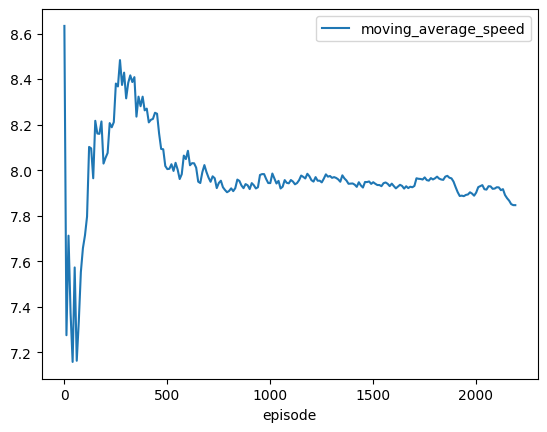

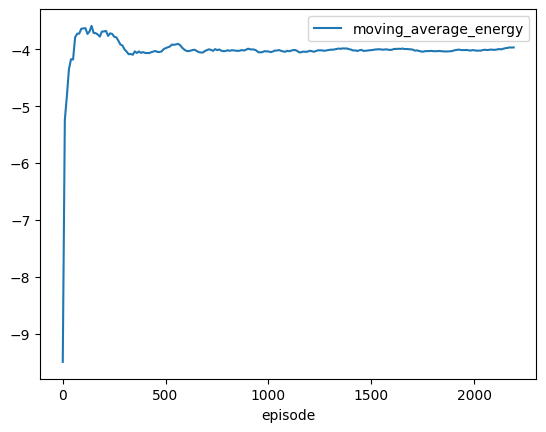

In [15]:
df["moving_average_speed"] = df["speed_reward"].cumsum()/(df["episode"])
df["moving_average_energy"] = df["energy_reward"].cumsum()/(df["episode"])

display(df)
df.iloc[::10].plot.line(x="episode", y="moving_average_speed")
df.iloc[::10].plot.line(x="episode", y="moving_average_energy")